In [1]:
import os
import shutil
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_class_names(dataset_path):
  """
  Extracts the names of the classes from the dataset directory structure.

  Args:
    dataset_path: The path to the dataset directory.

  Returns:
    A list of class names.
  """
  class_names = []
  for dirpath, dirnames, filenames in os.walk(dataset_path):
    for dirname in dirnames:
      class_names.append(dirname)
  return class_names

dataset_path = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\ Segmented leaf set using UNET segmentation"
class_names = get_class_names(dataset_path)
print(class_names)
print(len(class_names))

['Abelmoschus moschatus medik(Ambrette )', 'Aegle marmelos (L.) corrêa(Wood apple)', 'Aerva sanguinolenta(Karadia)', 'Aloe vera (L.) burm.F(Aloe Vera)', 'Alpinia galanga (L.) willd(Blue ginger)', 'Andrographis paniculata (Burm.F.) Wall(Green Chirayta)', 'Aquilaria malaccensis(Eagle wood)', 'Aristolochia indica L(Indian Birthwort)', 'Artemisia absinthium L(Common Wormwood)', 'Azadirachta indica[Meliaceae](Indian lilac)', 'Bacopa monnieri (L.) Wettst(Water hyssop)', 'Belamcanda chinensis (L.) redouté(Blackberry Lily)', 'Bixa orellana L(Lipstick tree)', 'Boerhavia diffusa(Red spiderling)', 'Breynia androgyna (L.) (Star gooseberry)', 'Brucea mollis Wall. Ex Kurz(Kunain)', 'Canna indica L.(Indian shot)', 'Cassia fistula L.(Golden Shower Tree)', 'Catharanthus roseus (L.) G.Don(Madagascar periwinkle)', 'Centella asiatica (L.) Urb(Asiatic pennywort)', 'Chamaecostus cuspidatus (Nees & Mart.)(Fiery costus)', 'Cinnamomum tamala T.Nees & Eberm.(Malabar leaf)', 'Cinnamomum verum J.Presl(True cinnam

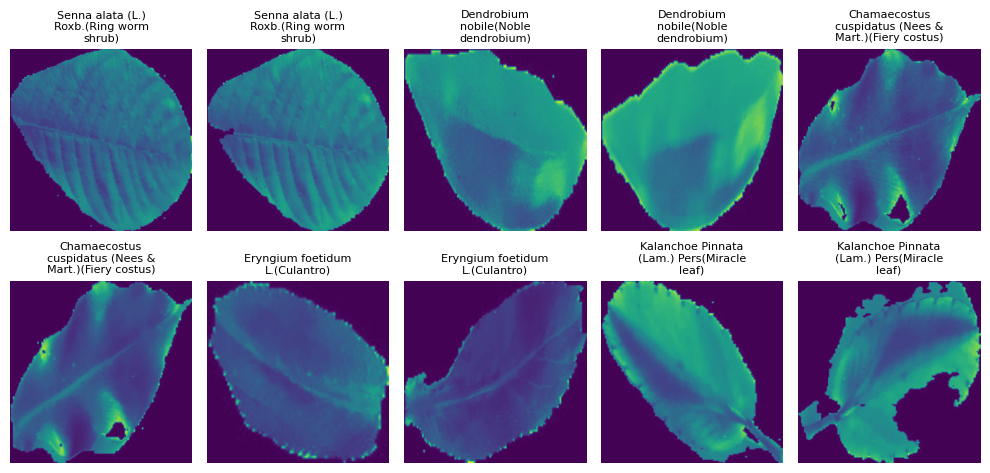

In [4]:
import os
import random
import matplotlib.pyplot as plt
import textwrap

def get_random_images(train_folder, num_images_per_species=2, max_species=5):
  """
  Selects random images from multiple subfolders within a train folder.

  Args:
    train_folder: Path to the main train folder.
    num_images_per_species: Number of random images to select per species.
    max_species: Maximum number of species to sample from.

  Returns:
    A list of image paths and a list of corresponding species labels.
  """

  image_paths = []
  species_labels = []
  selected_species = random.sample(os.listdir(train_folder), max_species)
  for species_folder in selected_species:
    species_path = os.path.join(train_folder, species_folder)
    if os.path.isdir(species_path):
      images = [os.path.join(species_path, img) for img in os.listdir(species_path)]
      selected_images = random.sample(images, min(num_images_per_species, len(images)))
      image_paths.extend(selected_images)
      species_labels.extend([species_folder] * len(selected_images))
  return image_paths, species_labels

# Example usage
train_folder = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\train"  # Replace with the actual path
image_paths, species_labels = get_random_images(train_folder)

# Display the images with annotations
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
  img = plt.imread(image_paths[i])
  ax.imshow(img)
  
  # Wrap the title text
  title = "\n".join(textwrap.wrap(species_labels[i], width=20))  # Adjust width as needed
  ax.set_title(title, fontsize=8)
  
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def split_dataset(dir_path, dataset_path, train_ratio=0.8, val_ratio=0.2):
    """
    Splits the dataset into train and validation sets.

    Args:
        dataset_path: The path to the dataset directory.
        train_ratio: The ratio of images to be used for training.
        val_ratio: The ratio of images to be used for validation.
    """

    # Create train and validation directories
    train_dir = os.path.join(dir_path, 'train')
    val_dir = os.path.join(dir_path, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    total_images = 0

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            total_images += len(images)

            random.shuffle(images)
            train_split = int(len(images) * train_ratio)
            val_split = int(len(images) * (train_ratio + val_ratio))

            # Copy images to train directory
            for image in images[:train_split]:
                src = os.path.join(class_path, image)
                dst = os.path.join(train_dir, class_name, image)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copyfile(src, dst)
            
            # Copy images to validation directory
            for image in images[train_split:val_split]:
                src = os.path.join(class_path, image)
                dst = os.path.join(val_dir, class_name, image)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copyfile(src, dst)
    
    print(total_images)

dir_path = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2"
dataset_path = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\ Segmented leaf set using UNET segmentation"
split_dataset(dir_path, dataset_path)

In [3]:
def count_images(folder_path):
    """
    Counts the number of images in a folder recursively.

    Args:
        folder_path: The path to the folder.

    Returns:
        The total number of images in the folder.
    """
    total_images = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_images += 1
    return total_images

dataset_dir = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\ Segmented leaf set using UNET segmentation"
train_dir = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\train"
val_dir = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\val"

train_count = count_images(train_dir)
val_count = count_images(val_dir)
dataset_count = count_images(dataset_dir)

print("Number of images in the dataset:", dataset_count)
print("Number of images in train folder:", train_count)
print("Number of images in validation folder:", val_count)

Number of images in the dataset: 70603
Number of images in train folder: 56685
Number of images in validation folder: 14346


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, ConcatDataset
import torchvision
#from vit_pytorch.t2t import T2TViT
from timm import create_model

In [5]:
def create_datasets_and_loaders():
    # Base transform
    base_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Augmentations
    augmentations = transforms.Compose([
        transforms.RandomResizedCrop(size=224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing(p=0.2)
    ])

    # Load the original dataset
    original_dataset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\train', transform=base_transform)

    # Create an augmented dataset
    augmented_dataset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\train', transform=augmentations)

    # Combine the original and augmented datasets
    trainset = ConcatDataset([original_dataset, augmented_dataset])

    # Create data loaders
    trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

    valset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\val', transform=base_transform)
    valloader = DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

    return trainloader, valloader, original_dataset.classes

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [6]:
trainloader, valloader, classes = create_datasets_and_loaders()
num_classes = len(classes)
results_log = []
num_classes

114

In [7]:
def train_model_og(model, model_name, trainloader, valloader, criterion, optimizer, num_epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    results = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            assert outputs.shape == (inputs.shape[0], num_classes), \
                f"Expected output shape {(inputs.shape[0], num_classes)}, but got {outputs.shape}"
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if isinstance(outputs, tuple):
                _, predicted = outputs[0].max(1)
            else:
                _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
        train_loss = running_loss / len(trainloader)
        train_acc = 100. * correct / total

        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                if isinstance(outputs, tuple):
                    _, predicted = outputs[0].max(1)
                else:
                    _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        val_loss = val_loss / len(valloader)
        val_acc = 100. * val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print()
        
        results.append([epoch+1, train_loss, train_acc, val_loss, val_acc])
        
    return [model_name, results]

# CNN models

In [10]:
import torchvision.models as models

models_list = [
    models.resnet50(pretrained=True),
    models.mobilenet_v2(pretrained=True),
    models.densenet121(pretrained=True),
    models.efficientnet_b0(pretrained=True),
    models.vgg16(pretrained=True)
]

In [11]:
def create_datasets_and_loaders():
    # Base transform
    base_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Augmentations
    augmentations = transforms.Compose([
        transforms.RandomResizedCrop(size=224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing(p=0.2)
    ])

    # Load the original dataset
    original_dataset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 1\train', transform=base_transform)

    # Create an augmented dataset
    augmented_dataset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 1\train', transform=augmentations)

    # Combine the original and augmented datasets
    trainset = ConcatDataset([original_dataset, augmented_dataset])

    # Create data loaders
    trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

    valset = torchvision.datasets.ImageFolder(root=r'C:\Users\CoolA\Code\Medicinal Leaves\Dataset 1\val', transform=base_transform)
    valloader = DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

    return trainloader, valloader

In [12]:
cnn_results = []

for model in models_list:
    # Reset datasets and dataloaders
    trainloader, valloader = create_datasets_and_loaders()

    # Setting up the final fully connected layer
    if isinstance(model, models.ResNet):
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, 30)
    elif isinstance(model, models.MobileNetV2):
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, 30)
    elif isinstance(model, models.DenseNet):
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, 30)
    elif isinstance(model, models.EfficientNet):
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, 30)
    elif isinstance(model, models.VGG):
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, 30)
        
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Loss function
    criterion = nn.CrossEntropyLoss()
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
    # Print the number of parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Parameters of {type(model).__name__}:",total_params)
    
    # Training
    num_epochs = 10
    model_results = []
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        # Evaluation on training set
        avg_train_loss = running_train_loss / len(trainloader)
        train_accuracy = 100 * correct_train / total_train
        
        # Evaluation on validation set
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data in valloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        avg_val_loss = running_val_loss / len(valloader)
        val_accuracy = 100 * correct_val / total_val
        
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
        
        model_results.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy
        })
    
    cnn_results.append({
        'model': type(model).__name__,
        'epochs': model_results
    })
    
    print(f"Finished training {type(model).__name__}")
    print('-' * 50)

Parameters of ResNet: 23569502
Epoch 1/10: Train Loss: 1.6200, Train Acc: 53.33% Val Loss: 2.0898, Val Acc: 56.84%
Epoch 2/10: Train Loss: 0.7724, Train Acc: 77.25% Val Loss: 3.5884, Val Acc: 40.53%
Epoch 3/10: Train Loss: 0.5770, Train Acc: 82.30% Val Loss: 0.9638, Val Acc: 74.74%
Epoch 4/10: Train Loss: 0.5226, Train Acc: 84.78% Val Loss: 1.1939, Val Acc: 72.89%
Epoch 5/10: Train Loss: 0.4682, Train Acc: 85.95% Val Loss: 0.2804, Val Acc: 93.16%
Epoch 6/10: Train Loss: 0.3984, Train Acc: 88.28% Val Loss: 0.2125, Val Acc: 92.89%
Epoch 7/10: Train Loss: 0.3689, Train Acc: 89.21% Val Loss: 0.3608, Val Acc: 87.37%
Epoch 8/10: Train Loss: 0.3170, Train Acc: 90.48% Val Loss: 0.3751, Val Acc: 89.47%
Epoch 9/10: Train Loss: 0.3377, Train Acc: 90.03% Val Loss: 0.1283, Val Acc: 95.79%
Epoch 10/10: Train Loss: 0.2798, Train Acc: 92.20% Val Loss: 0.6872, Val Acc: 84.74%
Finished training ResNet
--------------------------------------------------
Parameters of MobileNetV2: 2262302
Epoch 1/10: Train

In [14]:
# Print or save the results
for model_result in cnn_results:
    print(f"Results for {model_result['model']}:")
    for epoch_result in model_result['epochs']:
        print(f"Epoch {epoch_result['epoch']}: Loss={epoch_result['loss']:.4f}, "
              
              f"Train Acc={epoch_result['train_accuracy']:.2f}%, "
              f"Val Acc={epoch_result['val_accuracy']:.2f}%")
    print('-' * 50)

Results for ResNet:


KeyError: 'loss'

# ViT Models

In [23]:
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import jaccard_score, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_learning_curves(results, model_name, dataset_name):
    """
    Creates and saves plots for training/validation loss and accuracy curves.
    
    Args:
        results: List of lists containing metrics for each epoch
        model_name: Name of the model being trained
        dataset_name: Name of the dataset used for training
        
    Returns:
        None. Saves two plots in the Learning Curves directory:
        1. Loss curves plot
        2. Accuracy curves plot
    """
    # Create directory for saving plots
    base_dir = r"C:\Users\CoolA\Code\Medicinal Leaves\Dataset 2\Segmented\Learning Curves"
    dataset_dir = os.path.join(base_dir, dataset_name)
    os.makedirs(dataset_dir, exist_ok=True)
    
    # Extract metrics
    epochs = [r[0] for r in results]
    train_loss = [r[1] for r in results]
    train_acc = [r[2] for r in results]
    val_loss = [r[9] for r in results]  # Index 9 for validation loss
    val_acc = [r[10] for r in results]  # Index 10 for validation accuracy
    
    # Set style for better visualization
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Plot Loss Curves
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2)
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    
    # Save loss plot
    loss_plot_path = os.path.join(dataset_dir, f'{model_name}_loss_curves.png')
    plt.savefig(loss_plot_path, bbox_inches='tight', dpi=300)
    plt.close()
    
    # Plot Accuracy Curves
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Save accuracy plot
    acc_plot_path = os.path.join(dataset_dir, f'{model_name}_accuracy_curves.png')
    plt.savefig(acc_plot_path, bbox_inches='tight', dpi=300)
    plt.close()

def train_model(model, model_name, trainloader, valloader, criterion, optimizer, num_epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    trainloader, valloader, classes = create_datasets_and_loaders()
    model.to(device)
    results = []
    best_val_acc = 0.0
    
    folder_path = r'C:\Users\CoolA\Code\Medicinal Leaves\Segmented\Dataset 2'
    conf_matrix_dir = os.path.join(folder_path, "Confusion Matrices")
    os.makedirs(conf_matrix_dir, exist_ok=True)
    
    def compute_metrics(y_true, y_pred, y_pred_proba):
        """
        Computes various performance metrics for model evaluation.

        Args:
            y_true: Ground truth labels as a tensor.
            y_pred: Model predictions (class labels) as a tensor.
            y_pred_proba: Model prediction probabilities as a tensor.

        Returns:
            A dictionary containing the following metrics:
                - precision: Weighted average precision score
                - recall: Weighted average recall score
                - f1: Weighted average F1 score
                - log_loss: Logarithmic loss
                - jaccard: Weighted average Jaccard similarity score
                - roc_auc: ROC AUC score (one-vs-rest for multi-class)
        """
        metrics = {}
        # Convert predictions to numpy arrays and detach gradients
        y_true = y_true.cpu().detach().numpy()
        y_pred = y_pred.cpu().detach().numpy()
        y_pred_proba = y_pred_proba.cpu().detach().numpy()

        # Basic metrics
        metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        
        # Compute log loss
        metrics['log_loss'] = log_loss(y_true, y_pred_proba)
        
        # Jaccard score
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average='weighted')
        
        # ROC AUC score (multi-class)
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
        
        return metrics
    
    def plot_confusion_matrix(y_true, y_pred, title):
        """
        Creates and saves an enhanced confusion matrix visualization.

        Args:
            y_true: Ground truth labels as a tensor
            y_pred: Model predictions as a tensor
            title: String containing the model name
        
        Returns:
            None. Saves the confusion matrix plot as a PNG file
        """
        # Calculate confusion matrix
        cm = confusion_matrix(y_true.cpu(), y_pred.cpu())
        
        # Create figure with appropriate size
        plt.figure(figsize=(20, 16))
        
        # Create heatmap with customized parameters
        sns.heatmap(
            cm,
            annot=True,  # Show numbers in cells
            fmt='d',     # Use integer format
            cmap='Blues',
            square=True, # Make cells square
            cbar_kws={'label': 'Count', 'shrink': .8},
            annot_kws={'size': 6},  # Smaller font size for numbers
            linewidths=0.1,         # Thin lines between cells
            linecolor='gray'
        )
        
        # Customize title and labels
        plt.title(f'Confusion Matrix - {title}', pad=20, size=14)
        plt.ylabel('True Label', labelpad=10)
        plt.xlabel('Predicted Label', labelpad=10)
        
        # Rotate axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        # Only show every nth tick to reduce crowding
        n = 5  # Adjust this value based on your needs
        plt.xticks(range(0, len(cm), n))
        plt.yticks(range(0, len(cm), n))
        
        # Add gridlines for better readability
        plt.grid(False)
        
        # Tight layout to prevent label cutoff
        plt.tight_layout()
        
        # Save with high DPI for better quality
        filename = os.path.join(conf_matrix_dir, f'{title}_confusion_matrix.png')
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        plt.close()

    # Optional: If you want to customize colors and style
    def set_plotting_style():
        """
        Sets consistent plotting style for better visualizations.
        Call this once before creating plots.
        """
        plt.style.use('seaborn')
        sns.set_style("whitegrid", {
            'axes.grid': False,
            'axes.spines.top': False,
            'axes.spines.right': False
        })
        
        # Custom color palette
        colors = sns.color_palette("Blues", n_colors=9)
        sns.set_palette(colors)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        all_train_labels = []
        all_train_preds = []
        all_train_probs = []

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            assert outputs.shape == (inputs.shape[0], num_classes), \
                f"Expected output shape {(inputs.shape[0], num_classes)}, but got {outputs.shape}"
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            probabilities = torch.softmax(outputs, dim=1)
            if isinstance(outputs, tuple):
                _, predicted = outputs[0].max(1)
            else:
                _, predicted = outputs.max(1)
            
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            # Collect predictions and labels for metrics
            all_train_labels.append(labels)
            all_train_preds.append(predicted)
            all_train_probs.append(probabilities)

        # Compute training metrics
        train_loss = running_loss / len(trainloader)
        train_acc = 100. * correct / total
        
        all_train_labels = torch.cat(all_train_labels)
        all_train_preds = torch.cat(all_train_preds)
        all_train_probs = torch.cat(all_train_probs)
        
        train_metrics = compute_metrics(all_train_labels, all_train_preds, all_train_probs)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        all_val_labels = []
        all_val_preds = []
        all_val_probs = []

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                probabilities = torch.softmax(outputs, dim=1)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                if isinstance(outputs, tuple):
                    _, predicted = outputs[0].max(1)
                else:
                    _, predicted = outputs.max(1)
                    
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
                # Collect predictions and labels for metrics
                all_val_labels.append(labels)
                all_val_preds.append(predicted)
                all_val_probs.append(probabilities)

        val_loss = val_loss / len(valloader)
        val_acc = 100. * val_correct / val_total
        
        all_val_labels = torch.cat(all_val_labels)
        all_val_preds = torch.cat(all_val_preds)
        all_val_probs = torch.cat(all_val_probs)
        
        val_metrics = compute_metrics(all_val_labels, all_val_preds, all_val_probs)

        # Generate confusion matrix at the end of training
        if epoch == num_epochs - 1:
            plot_confusion_matrix(all_val_labels, all_val_preds, model_name)

        # Print metrics
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print('Training Metrics:')
        for metric, value in train_metrics.items():
            print(f'  {metric}: {value:.4f}')
        
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('Validation Metrics:')
        for metric, value in val_metrics.items():
            print(f'  {metric}: {value:.4f}')
        print()
        
        # Store results
        epoch_results = [
            epoch+1, 
            train_loss, train_acc, 
            train_metrics['precision'], train_metrics['recall'], 
            train_metrics['f1'], train_metrics['log_loss'],
            train_metrics['jaccard'], train_metrics['roc_auc'],
            val_loss, val_acc,
            val_metrics['precision'], val_metrics['recall'],
            val_metrics['f1'], val_metrics['log_loss'],
            val_metrics['jaccard'], val_metrics['roc_auc']
        ]
        results.append(epoch_results)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_{model_name}.pth')
    
    dataset_name = "Dataset 2_Segmented"    
    
    # After training is complete, plot learning curves
    plot_learning_curves(results, model_name, dataset_name)
    
    return [model_name, results]

## Small ViT Models

### DeiT Tiny (5M)

In [34]:
class DistillationLoss(torch.nn.Module):
    def __init__(self, base_criterion: torch.nn.Module, alpha: float = 0.5):
        super().__init__()
        self.base_criterion = base_criterion
        self.alpha = alpha

    def forward(self, outputs, labels):
        if isinstance(outputs, tuple):
            outputs, outputs_kd = outputs
            loss = self.base_criterion(outputs, labels)
            loss_kd = self.base_criterion(outputs_kd, labels)
            loss = self.alpha * loss + (1 - self.alpha) * loss_kd
        else:
            loss = self.base_criterion(outputs, labels)
        return loss

In [35]:
# Setup and check model
model = create_model('deit_tiny_distilled_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, num_classes)
model.head_dist = nn.Linear(model.head_dist.in_features, num_classes)

print(f"DeiT-Tiny parameters: {count_parameters(model)}")
model

DeiT-Tiny parameters: 5568804


VisionTransformerDistilled(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Id

In [ ]:
# Train model
base_criterion = nn.CrossEntropyLoss()
criterion = DistillationLoss(base_criterion, alpha=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "DeiT-Tiny", trainloader, valloader, criterion, optimizer))

### MobileViT XXS (0.96M)

In [12]:
# Setup and check model
model = create_model('mobilevit_xxs', pretrained=True)
in_features = model.head.fc.in_features
model.head.fc = nn.Linear(in_features, num_classes)
#model.head = nn.Linear(model.head.in_features, num_classes)

print(f"MobileViT-XXS parameters: {count_parameters(model)}")
model

MobileViT-XXS parameters: 987618


ByobNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (stages): Sequential(
    (0): Sequential(
      (0): BottleneckBlock(
        (shortcut): Identity()
        (conv1_1x1): ConvNormAct(
          (conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
        )
        (conv2_kxk): ConvNormAct(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
          

In [15]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "MobileViT-XXS", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 0.4859, Train Acc: 88.46%
Training Metrics:
  precision: 0.8858
  recall: 0.8846
  f1: 0.8844
  log_loss: 0.4859
  jaccard: 0.7951
  roc_auc: 0.9972
Val Loss: 0.0412, Val Acc: 98.88%
Validation Metrics:
  precision: 0.9894
  recall: 0.9888
  f1: 0.9885
  log_loss: 0.0412
  jaccard: 0.9785
  roc_auc: 1.0000

Epoch 2/20:
Train Loss: 0.1618, Train Acc: 95.71%
Training Metrics:
  precision: 0.9575
  recall: 0.9571
  f1: 0.9572
  log_loss: 0.1618
  jaccard: 0.9189
  roc_auc: 0.9997
Val Loss: 0.0667, Val Acc: 98.24%
Validation Metrics:
  precision: 0.9841
  recall: 0.9824
  f1: 0.9823
  log_loss: 0.0668
  jaccard: 0.9668
  roc_auc: 1.0000

Epoch 3/20:
Train Loss: 0.1268, Train Acc: 96.56%
Training Metrics:
  precision: 0.9660
  recall: 0.9656
  f1: 0.9657
  log_loss: 0.1268
  jaccard: 0.9344
  roc_auc: 0.9998
Val Loss: 0.0420, Val Acc: 99.00%
Validation Metrics:
  precision: 0.9912
  recall: 0.9900
  f1: 0.9902
  log_loss: 0.0421
  jaccard: 0.9814
  roc_auc: 1.0000

E

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

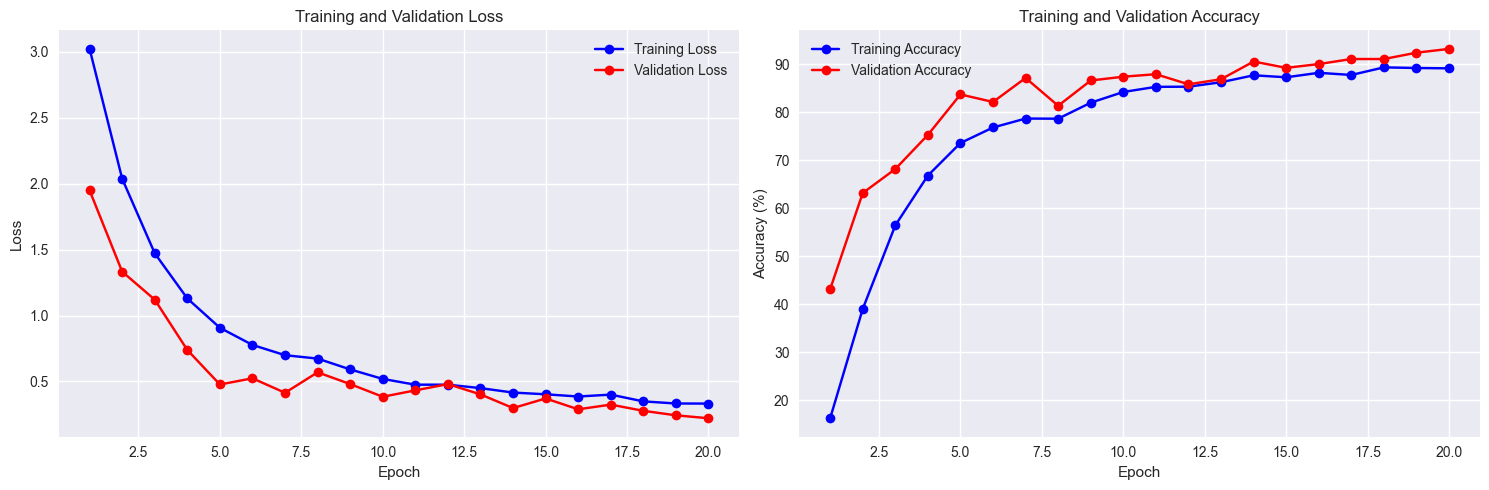

In [22]:
import matplotlib.pyplot as plt
import re

# Extract metrics from the string
def extract_metrics(log_string):
    epochs = []
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    pattern = r'Epoch (\d+)/20: Train Loss: ([\d.]+), Train Acc: ([\d.]+)% Val Loss: ([\d.]+), Val Acc: ([\d.]+)%'
    
    for match in re.finditer(pattern, log_string):
        epochs.append(int(match.group(1)))
        train_loss.append(float(match.group(2)))
        train_acc.append(float(match.group(3)))
        val_loss.append(float(match.group(4)))
        val_acc.append(float(match.group(5)))
    
    return epochs, train_loss, train_acc, val_loss, val_acc

# Create the visualization
def plot_training_metrics(log_string):
    epochs, train_loss, train_acc, val_loss, val_acc = extract_metrics(log_string)
    # Set style for better visualization
    plt.style.use('seaborn-v0_8-notebook')
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(epochs, train_loss, 'b-', label='Training Loss', marker='o')
    ax1.plot(epochs, val_loss, 'r-', label='Validation Loss', marker='o')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracies
    ax2.plot(epochs, train_acc, 'b-', label='Training Accuracy', marker='o')
    ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy', marker='o')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Your log string goes here
log_string = """Epoch 1/20: Train Loss: 3.0225, Train Acc: 16.29% Val Loss: 1.9491, Val Acc: 43.16% Epoch 2/20: Train Loss: 2.0377, Train Acc: 39.04% Val Loss: 1.3327, Val Acc: 63.16% Epoch 3/20: Train Loss: 1.4719, Train Acc: 56.43% Val Loss: 1.1203, Val Acc: 68.16% Epoch 4/20: Train Loss: 1.1294, Train Acc: 66.80% Val Loss: 0.7386, Val Acc: 75.26% Epoch 5/20: Train Loss: 0.9070, Train Acc: 73.57% Val Loss: 0.4768, Val Acc: 83.68% Epoch 6/20: Train Loss: 0.7768, Train Acc: 76.80% Val Loss: 0.5236, Val Acc: 82.11% Epoch 7/20: Train Loss: 0.6990, Train Acc: 78.66% Val Loss: 0.4139, Val Acc: 87.11% Epoch 8/20: Train Loss: 0.6733, Train Acc: 78.63% Val Loss: 0.5692, Val Acc: 81.32% Epoch 9/20: Train Loss: 0.5911, Train Acc: 81.96% Val Loss: 0.4799, Val Acc: 86.58% Epoch 10/20: Train Loss: 0.5189, Train Acc: 84.19% Val Loss: 0.3837, Val Acc: 87.37% Epoch 11/20: Train Loss: 0.4753, Train Acc: 85.26% Val Loss: 0.4324, Val Acc: 87.89% Epoch 12/20: Train Loss: 0.4752, Train Acc: 85.29% Val Loss: 0.4795, Val Acc: 85.79% Epoch 13/20: Train Loss: 0.4493, Train Acc: 86.22% Val Loss: 0.4018, Val Acc: 86.84% Epoch 14/20: Train Loss: 0.4155, Train Acc: 87.66% Val Loss: 0.2979, Val Acc: 90.53% Epoch 15/20: Train Loss: 0.4025, Train Acc: 87.25% Val Loss: 0.3708, Val Acc: 89.21% Epoch 16/20: Train Loss: 0.3856, Train Acc: 88.18% Val Loss: 0.2886, Val Acc: 90.00% Epoch 17/20: Train Loss: 0.3999, Train Acc: 87.73% Val Loss: 0.3242, Val Acc: 91.05% Epoch 18/20: Train Loss: 0.3486, Train Acc: 89.31% Val Loss: 0.2770, Val Acc: 91.05% Epoch 19/20: Train Loss: 0.3327, Train Acc: 89.18% Val Loss: 0.2430, Val Acc: 92.37% Epoch 20/20: Train Loss: 0.3320, Train Acc: 89.11% Val Loss: 0.2207, Val Acc: 93.16%"""

# Generate the plots
plot_training_metrics(log_string)

### EfficientFormer-L1 12M

In [24]:
# Setup and check model
model = create_model('efficientformer_l1', pretrained=True)
model.head = nn.Linear(model.head.in_features, num_classes)
model.head_dist = nn.Linear(model.head_dist.in_features, num_classes)

print(f"EfficientFormer-L1 parameters: {count_parameters(model)}")
model

EfficientFormer-L1 parameters: 11494300


EfficientFormer(
  (stem): Stem4(
    (conv1): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (norm1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU()
    (conv2): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (norm2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU()
  )
  (stages): Sequential(
    (0): EfficientFormerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): MetaBlock2d(
          (token_mixer): Pooling(
            (pool): AvgPool2d(kernel_size=3, stride=1, padding=1)
          )
          (ls1): LayerScale2d()
          (drop_path1): Identity()
          (mlp): ConvMlpWithNorm(
            (fc1): Conv2d(48, 192, kernel_size=(1, 1), stride=(1, 1))
            (norm1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act): GELU(approximate='none')
            

In [25]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "EfficientFormer-L1", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 0.3167, Train Acc: 91.90%
Training Metrics:
  precision: 0.9197
  recall: 0.9190
  f1: 0.9191
  log_loss: 0.3167
  jaccard: 0.8521
  roc_auc: 0.9988
Val Loss: 2.7390, Val Acc: 63.04%
Validation Metrics:
  precision: 0.7708
  recall: 0.6304
  f1: 0.6352
  log_loss: 2.7060
  jaccard: 0.5579
  roc_auc: 0.9820

Epoch 2/20:
Train Loss: 0.1522, Train Acc: 95.93%
Training Metrics:
  precision: 0.9596
  recall: 0.9593
  f1: 0.9594
  log_loss: 0.1522
  jaccard: 0.9229
  roc_auc: 0.9998
Val Loss: 6.4942, Val Acc: 33.78%
Validation Metrics:
  precision: 0.6424
  recall: 0.3378
  f1: 0.3383
  log_loss: 6.2071
  jaccard: 0.2741
  roc_auc: 0.9082

Epoch 3/20:
Train Loss: 0.1204, Train Acc: 96.74%
Training Metrics:
  precision: 0.9676
  recall: 0.9674
  f1: 0.9675
  log_loss: 0.1203
  jaccard: 0.9376
  roc_auc: 0.9998
Val Loss: 0.7966, Val Acc: 85.71%
Validation Metrics:
  precision: 0.9324
  recall: 0.8571
  f1: 0.8613
  log_loss: 0.7965
  jaccard: 0.7988
  roc_auc: 0.9984

E

In [ ]:
# Your log string goes here
log_string = """Epoch 1/20: Train Loss: 3.0225, Train Acc: 16.29% Val Loss: 1.9491, Val Acc: 43.16% Epoch 2/20: Train Loss: 2.0377, Train Acc: 39.04% Val Loss: 1.3327, Val Acc: 63.16% Epoch 3/20: Train Loss: 1.4719, Train Acc: 56.43% Val Loss: 1.1203, Val Acc: 68.16% Epoch 4/20: Train Loss: 1.1294, Train Acc: 66.80% Val Loss: 0.7386, Val Acc: 75.26% Epoch 5/20: Train Loss: 0.9070, Train Acc: 73.57% Val Loss: 0.4768, Val Acc: 83.68% Epoch 6/20: Train Loss: 0.7768, Train Acc: 76.80% Val Loss: 0.5236, Val Acc: 82.11% Epoch 7/20: Train Loss: 0.6990, Train Acc: 78.66% Val Loss: 0.4139, Val Acc: 87.11% Epoch 8/20: Train Loss: 0.6733, Train Acc: 78.63% Val Loss: 0.5692, Val Acc: 81.32% Epoch 9/20: Train Loss: 0.5911, Train Acc: 81.96% Val Loss: 0.4799, Val Acc: 86.58% Epoch 10/20: Train Loss: 0.5189, Train Acc: 84.19% Val Loss: 0.3837, Val Acc: 87.37% Epoch 11/20: Train Loss: 0.4753, Train Acc: 85.26% Val Loss: 0.4324, Val Acc: 87.89% Epoch 12/20: Train Loss: 0.4752, Train Acc: 85.29% Val Loss: 0.4795, Val Acc: 85.79% Epoch 13/20: Train Loss: 0.4493, Train Acc: 86.22% Val Loss: 0.4018, Val Acc: 86.84% Epoch 14/20: Train Loss: 0.4155, Train Acc: 87.66% Val Loss: 0.2979, Val Acc: 90.53% Epoch 15/20: Train Loss: 0.4025, Train Acc: 87.25% Val Loss: 0.3708, Val Acc: 89.21% Epoch 16/20: Train Loss: 0.3856, Train Acc: 88.18% Val Loss: 0.2886, Val Acc: 90.00% Epoch 17/20: Train Loss: 0.3999, Train Acc: 87.73% Val Loss: 0.3242, Val Acc: 91.05% Epoch 18/20: Train Loss: 0.3486, Train Acc: 89.31% Val Loss: 0.2770, Val Acc: 91.05% Epoch 19/20: Train Loss: 0.3327, Train Acc: 89.18% Val Loss: 0.2430, Val Acc: 92.37% Epoch 20/20: Train Loss: 0.3320, Train Acc: 89.11% Val Loss: 0.2207, Val Acc: 93.16%"""

# Generate the plots
plot_training_metrics(log_string)

### ConNeXt Atto (3.38M)

In [26]:
# Setup and check model
model = create_model('convnext_atto', pretrained=True)
in_features = model.head.fc.in_features
model.head.fc = nn.Linear(in_features, num_classes)

print(f"ConvNeXt-Atto parameters: {count_parameters(model)}")
model

ConvNeXt-Atto parameters: 3411114


ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 40, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((40,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(40, 40, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=40)
          (norm): LayerNorm2d((40,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Conv2d(40, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (fc2): Conv2d(160, 40, kernel_size=(1, 1), stride=(1, 1))
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(40, 40, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=40)


In [27]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "ConvNeXt-Atto", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 2.2688, Train Acc: 47.82%
Training Metrics:
  precision: 0.5954
  recall: 0.4782
  f1: 0.5122
  log_loss: 2.2689
  jaccard: 0.3481
  roc_auc: 0.9308
Val Loss: 0.0431, Val Acc: 98.95%
Validation Metrics:
  precision: 0.9898
  recall: 0.9895
  f1: 0.9893
  log_loss: 0.0431
  jaccard: 0.9795
  roc_auc: 1.0000

Epoch 2/20:
Train Loss: 0.3599, Train Acc: 90.50%
Training Metrics:
  precision: 0.9056
  recall: 0.9050
  f1: 0.9051
  log_loss: 0.3599
  jaccard: 0.8282
  roc_auc: 0.9987
Val Loss: 0.0721, Val Acc: 98.05%
Validation Metrics:
  precision: 0.9838
  recall: 0.9805
  f1: 0.9806
  log_loss: 0.0711
  jaccard: 0.9647
  roc_auc: 1.0000

Epoch 3/20:
Train Loss: 0.2316, Train Acc: 93.87%
Training Metrics:
  precision: 0.9391
  recall: 0.9387
  f1: 0.9387
  log_loss: 0.2316
  jaccard: 0.8855
  roc_auc: 0.9994
Val Loss: 0.0110, Val Acc: 99.74%
Validation Metrics:
  precision: 0.9974
  recall: 0.9974
  f1: 0.9973
  log_loss: 0.0110
  jaccard: 0.9950
  roc_auc: 1.0000

E

### PVT-Tiny (3.43M)

In [28]:
# Setup and check model
model = create_model("pvt_v2_b0", pretrained=True, num_classes=num_classes)
print(f"PVT-Tiny-B0 parameters: {count_parameters(model)}")
model

PVT-Tiny-B0 parameters: 3439058


PyramidVisionTransformerV2(
  (patch_embed): OverlapPatchEmbed(
    (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
    (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): PyramidVisionTransformerStage(
      (blocks): ModuleList(
        (0-1): 2 x Block(
          (norm1): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (q): Linear(in_features=32, out_features=32, bias=True)
            (kv): Linear(in_features=32, out_features=64, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=32, out_features=32, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (sr): Conv2d(32, 32, kernel_size=(8, 8), stride=(8, 8))
            (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((32,), eps=1e-06, elementwise_affine

In [29]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "pvt_tiny_b0", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 4.6410, Train Acc: 3.14%
Training Metrics:
  precision: 0.0035
  recall: 0.0314
  f1: 0.0028
  log_loss: 4.6410
  jaccard: 0.0014
  roc_auc: 0.4974
Val Loss: 4.6324, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6329
  jaccard: 0.0010
  roc_auc: 0.5062

Epoch 2/20:
Train Loss: 4.6329, Train Acc: 3.21%
Training Metrics:
  precision: 0.0014
  recall: 0.0321
  f1: 0.0021
  log_loss: 4.6329
  jaccard: 0.0011
  roc_auc: 0.4955
Val Loss: 4.6291, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6291
  jaccard: 0.0010
  roc_auc: 0.5115

Epoch 3/20:
Train Loss: 4.6329, Train Acc: 3.21%
Training Metrics:
  precision: 0.0012
  recall: 0.0321
  f1: 0.0020
  log_loss: 4.6329
  jaccard: 0.0010
  roc_auc: 0.4953
Val Loss: 4.6273, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6274
  jaccard: 0.0010
  roc_auc: 0.4999

Epoch 4

### Tiny ViT 11M

In [30]:
# Setup and check model
model = create_model("tiny_vit_11m_224", pretrained=True, num_classes=num_classes)

print(f"Tiny-ViT 11M parameters: {count_parameters(model)}")
model

Tiny-ViT 11M parameters: 10599158


TinyVit(
  (patch_embed): PatchEmbed(
    (conv1): ConvNorm(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (act): GELU(approximate='none')
    (conv2): ConvNorm(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stages): Sequential(
    (0): ConvLayer(
      (blocks): Sequential(
        (0): MBConv(
          (conv1): ConvNorm(
            (conv): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (act1): GELU(approximate='none')
          (conv2): ConvNorm(
            (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=256, bias=Fals

In [31]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "tiny_vit_11m", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 0.4696, Train Acc: 89.27%
Training Metrics:
  precision: 0.8946
  recall: 0.8927
  f1: 0.8930
  log_loss: 0.4697
  jaccard: 0.8084
  roc_auc: 0.9973
Val Loss: 0.1573, Val Acc: 95.38%
Validation Metrics:
  precision: 0.9797
  recall: 0.9538
  f1: 0.9603
  log_loss: 0.1575
  jaccard: 0.9359
  roc_auc: 0.9999

Epoch 2/20:
Train Loss: 0.1575, Train Acc: 95.85%
Training Metrics:
  precision: 0.9587
  recall: 0.9585
  f1: 0.9585
  log_loss: 0.1575
  jaccard: 0.9211
  roc_auc: 0.9997
Val Loss: 0.0037, Val Acc: 99.90%
Validation Metrics:
  precision: 0.9991
  recall: 0.9990
  f1: 0.9990
  log_loss: 0.0037
  jaccard: 0.9981
  roc_auc: 1.0000

Epoch 3/20:
Train Loss: 0.1279, Train Acc: 96.55%
Training Metrics:
  precision: 0.9656
  recall: 0.9655
  f1: 0.9655
  log_loss: 0.1279
  jaccard: 0.9339
  roc_auc: 0.9998
Val Loss: 0.5389, Val Acc: 91.39%
Validation Metrics:
  precision: 0.9646
  recall: 0.9139
  f1: 0.9227
  log_loss: 0.5292
  jaccard: 0.8882
  roc_auc: 0.9981

E

### Swin Tiny

In [32]:
# Setup and check model
model = create_model('swin_tiny_patch4_window7_224', pretrained=True)
in_features = model.head.fc.in_features
model.head.fc = nn.Linear(in_features, num_classes)

print(f"Swin-Tiny parameters: {count_parameters(model)}")
model

Swin-Tiny parameters: 27607020


SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (layers): Sequential(
    (0): SwinTransformerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=96, out_features=384, bias=True)
            (act): GELU(approximate='none')
            (drop1): 

In [33]:
# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
results_log.append(train_model(model, "Swin-Tiny", trainloader, valloader, criterion, optimizer))

Epoch 1/20:
Train Loss: 4.5340, Train Acc: 3.67%
Training Metrics:
  precision: 0.0193
  recall: 0.0367
  f1: 0.0137
  log_loss: 4.5338
  jaccard: 0.0071
  roc_auc: 0.6048
Val Loss: 4.6497, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6500
  jaccard: 0.0010
  roc_auc: 0.6520

Epoch 2/20:
Train Loss: 4.6389, Train Acc: 3.16%
Training Metrics:
  precision: 0.0043
  recall: 0.0316
  f1: 0.0025
  log_loss: 4.6389
  jaccard: 0.0013
  roc_auc: 0.4958
Val Loss: 4.6346, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6348
  jaccard: 0.0010
  roc_auc: 0.5782

Epoch 3/20:
Train Loss: 4.6353, Train Acc: 3.19%
Training Metrics:
  precision: 0.0066
  recall: 0.0319
  f1: 0.0023
  log_loss: 4.6353
  jaccard: 0.0012
  roc_auc: 0.4973
Val Loss: 4.6313, Val Acc: 3.17%
Validation Metrics:
  precision: 0.0010
  recall: 0.0317
  f1: 0.0019
  log_loss: 4.6313
  jaccard: 0.0010
  roc_auc: 0.5542

Epoch 4

KeyboardInterrupt: 